In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pyuvdata import UVBeam

In [2]:
beam_obj = UVBeam()
beam_obj.read('/Users/ruby/Astro/rlb_LWA/LWAbeam_2015.fits')

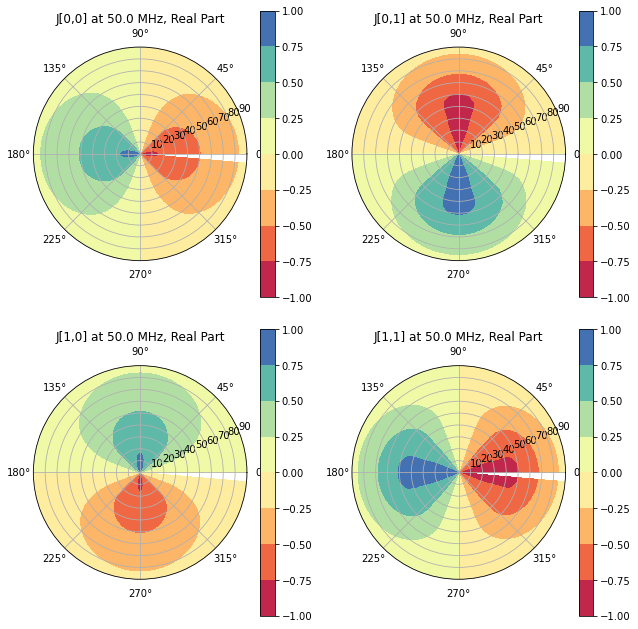

In [5]:
plot_freq = 50.
plot_freq_ind = np.where(beam_obj.freq_array[0, :] == plot_freq*1e6)[0][0]
use_cmap = matplotlib.cm.get_cmap("Spectral").copy()
use_cmap.set_bad(color='whitesmoke')

r_plot, theta_plot = np.meshgrid(
    np.degrees(beam_obj.axis2_array), # zenith angle coords
    np.degrees(beam_obj.axis1_array), # azimuth coords
)
fig, ax = plt.subplots(nrows=2, ncols=2, subplot_kw=dict(projection='polar'), figsize=(9,9))
for pol1 in [0, 1]:
    for pol2 in [0, 1]:
        contourplot = ax[pol1, pol2].contourf(
            np.radians(theta_plot),
            r_plot,
            np.real(beam_obj.data_array[pol1, 0, pol2, plot_freq_ind, :, :].T),
            vmin=-1,
            vmax=1,
            cmap=use_cmap
        )
        contourplot.set_clim(vmin=-1, vmax=1)
        fig.colorbar(contourplot, ax=ax[pol1, pol2])
        ax[pol1, pol2].set_title(f'J[{pol1},{pol2}] at {plot_freq} MHz, Real Part')
fig.tight_layout()
plt.show()

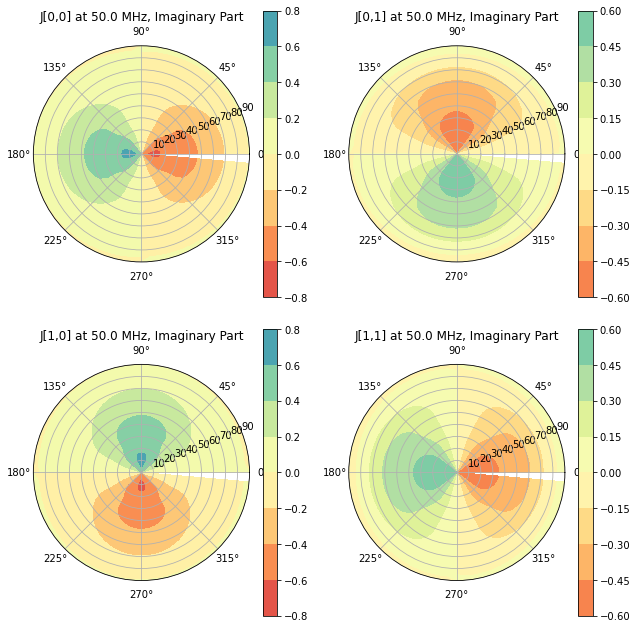

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, subplot_kw=dict(projection='polar'), figsize=(9,9))
for pol1 in [0, 1]:
    for pol2 in [0, 1]:
        contourplot = ax[pol1, pol2].contourf(
            np.radians(theta_plot),
            r_plot,
            np.imag(beam_obj.data_array[pol1, 0, pol2, plot_freq_ind, :, :].T),
            vmin=-1,
            vmax=1,
            cmap=use_cmap
        )
        contourplot.set_clim(vmin=-1, vmax=1)
        fig.colorbar(contourplot, ax=ax[pol1, pol2])
        ax[pol1, pol2].set_title(f'J[{pol1},{pol2}] at {plot_freq} MHz, Imaginary Part')
fig.tight_layout()
plt.show()